# Lab 2 numerical work
### Plot $\hat{P}(\hat{V})$, $\hat{G}(\hat{V})$, and $\hat{G}(\hat{P})$:

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

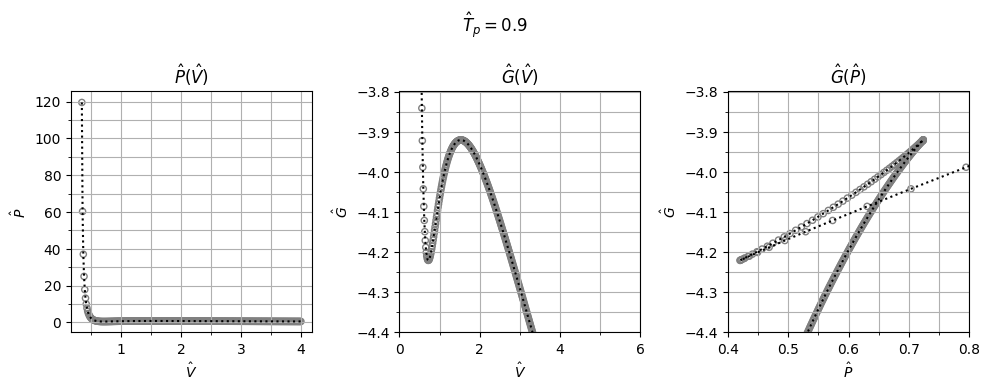

In [99]:
# Parameters
T_hat_b = 0.9  # boiling temperature
V_hat = np.linspace(0.35, 4, 300)  # V_hat >=  1/3, otherwise we get ln(negative number) in G_hat.

# Plotting parameters
scatter_size = 20
scatter_color = "gray"
plot_marker = "k:"

# Expressions
P_hat = 8 * T_hat_b / (3 * V_hat - 1) - 3 / V_hat**2
G_hat = -8 / 3 * T_hat_b * np.log(3 * V_hat - 1) - 3 / V_hat + P_hat * V_hat

fig, axs = plt.subplots(1, 3, figsize=(10, 6))
fig.suptitle("$\hat{T}_p=$" + str(T_hat_b), y=0.8)

# Plot P_hat(V_hat)
axs[0].scatter(V_hat, P_hat, scatter_size, color=scatter_color, facecolors="none")
axs[0].plot(V_hat, P_hat, plot_marker)
axs[0].set_xlabel("$\hat{V}$")
axs[0].set_ylabel("$\hat{P}$")
axs[0].set_title("$\hat{P}(\hat{V})$")
axs[0].xaxis.set_minor_locator(MultipleLocator(0.5))  # set minor grid yticks
axs[0].yaxis.set_minor_locator(MultipleLocator(10))  # set minor grid yticks
axs[0].set_box_aspect(1)
axs[0].grid(True, which="both")

# Plot G_hat(V_hat):
axs[1].scatter(V_hat, G_hat, scatter_size, color=scatter_color, facecolors="none")
axs[1].plot(V_hat, G_hat, plot_marker)
axs[1].set_xlabel("$\hat{V}$")
axs[1].set_ylabel("$\hat{G}$")
axs[1].set_title("$\hat{G}(\hat{V})$")
axs[1].set_xlim(0, 6)
axs[1].set_ylim(-4.4, -3.8)
axs[1].xaxis.set_minor_locator(MultipleLocator(1))  # set minor grid xticks
axs[1].yaxis.set_minor_locator(MultipleLocator(0.05))  # set minor grid yticks
axs[1].set_box_aspect(1)
axs[1].grid(True, which="both")

# Plot G_hat(P_hat):
axs[2].scatter(P_hat, G_hat, scatter_size, color=scatter_color, facecolors="none")
axs[2].plot(P_hat, G_hat, plot_marker)
axs[2].set_xlabel("$\hat{P}$")
axs[2].set_ylabel("$\hat{G}$")
axs[2].set_title("$\hat{G}(\hat{P})$")
axs[2].set_xlim(0.4, 0.8)
axs[2].set_ylim(-4.4, -3.8)
axs[2].xaxis.set_minor_locator(MultipleLocator(0.05))  # set minor grid xticks
axs[2].yaxis.set_minor_locator(MultipleLocator(0.05))  # set minor grid yticks
axs[2].set_box_aspect(1)  # make plot square 
axs[2].grid(True, which="both")

plt.tight_layout()

### Determine the coexistance line numerically:

From the above plot we see that $G_l=G_g$ at around $\hat{G}=-4.08$ which happens at around $\hat{P}=0.64$. I will now loop over different $\hat{T}_p$ values and note each $\hat{P}$ value where $G_l=G_g$ and then the corresponding $\Delta \hat{V}$ value at that $\hat{P}$:

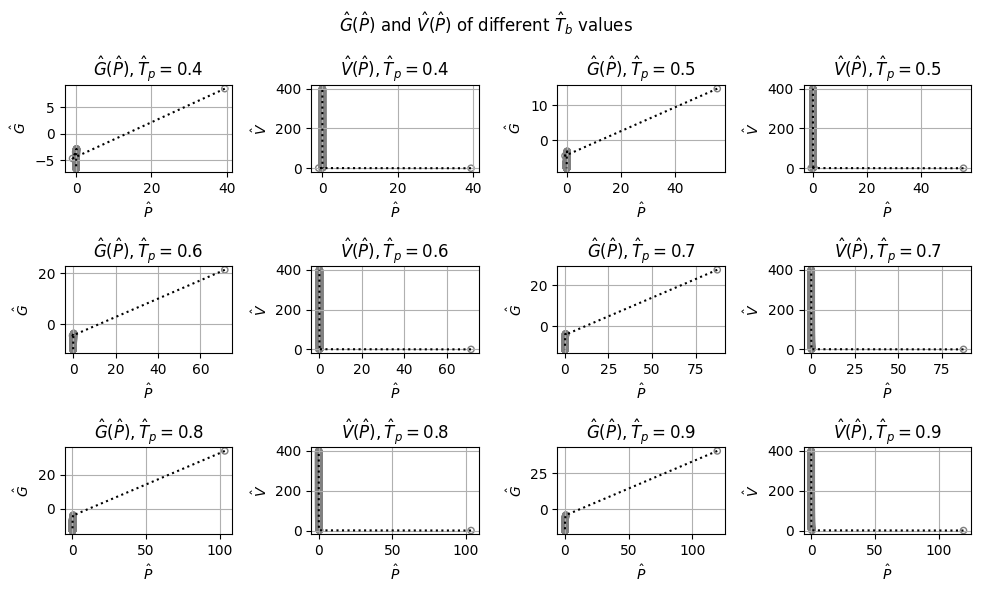

In [128]:
"""
Created on 16.10.2023
"""

import numpy as np
import matplotlib.pyplot as plt


# Parameters
T_hat_b_list = np.arange(0.4, 1, 0.1)  # boiling temperature
V_hat = np.linspace(0.35, 400, 500)  # V_hat >=  1/3, otherwise we get ln(negative number) in G_hat.

# Plotting parameters
scatter_size = 20
scatter_color = "gray"
plot_marker = "k:"
nrows = 3
ncols = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(10, 6))
fig.suptitle("$\hat{G}(\hat{P})$ and $\hat{V}(\hat{P})$ of different $\hat{T}_b$ values")

i = 0
j = 0
for k, T_hat_b in enumerate(T_hat_b_list):
    if j >= ncols:
        i += 1
        j = 0

    # Expressions
    P_hat = 8 * T_hat_b / (3 * V_hat - 1) - 3 / V_hat**2
    G_hat = -8 / 3 * T_hat_b * np.log(3 * V_hat - 1) - 3 / V_hat + P_hat * V_hat

    # Plot G_hat(P_hat):
    ax1 = axs[i, j]
    ax1.scatter(P_hat, G_hat, scatter_size, color=scatter_color, facecolors="none")
    ax1.plot(P_hat, G_hat, plot_marker)
    ax1.set_title("$\hat{G}(\hat{P}), \hat{T}_p=$" + f"{T_hat_b:.1f}")
    ax1.set_xlabel("$\hat{P}$")
    ax1.set_ylabel("$\hat{G}$")
    ax1.grid(True)

    j += 1
    if j >= ncols:
        i += 1
        j = 0

    # Plot V_hat(P_hat):
    ax2 = axs[i, j]
    ax2.scatter(P_hat, V_hat, scatter_size, color=scatter_color, facecolors="none")
    ax2.plot(P_hat, V_hat, plot_marker)
    ax2.set_title("$\hat{V}(\hat{P}), \hat{T}_p=$" + f"{T_hat_b:.1f}")
    ax2.set_xlabel("$\hat{P}$")
    ax2.set_ylabel("$\hat{V}$")
    ax2.grid(True)

    j += 1

plt.tight_layout()
plt.show()

The values are hard to see from here, so I've made a separate python script $\texttt{G_and_V_plots.py}$ for showing the plot window for manual zooming. The values are shown in the below table


| $\hat{T}_p$ | $\hat{P}$ | $\Delta \hat{V}$   |
|-------------|-----------|--------------------|
| 0.4         | 0.025     | 37.3               |
| 0.5         | 0.065     | 16.4               |
| 0.6         | 0.146     | 7.23               |
| 0.7         | 0.272     | 3.54               |
| 0.8         | 0.452     | 1.62               |
| 0.9         | 0.692     | 0.4                |

### Plot the coexistence line:

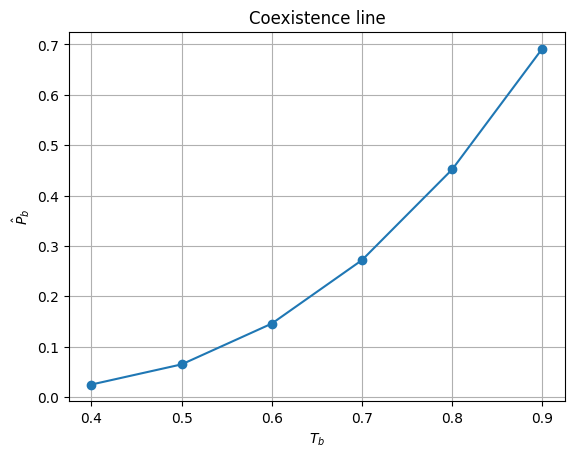

In [160]:
P = np.asarray([0.025, 0.065, 0.146, 0.272, 0.452, 0.692])
T = np.arange(0.4, 1, 0.1)

plt.plot(T, P, "o-")
plt.ylabel("$\hat{P}_b$")
plt.xlabel("$T_b$")
plt.title("Coexistence line")
plt.grid(True)

### Use the Clausius-Clapeyron relation to determine the latent heat (heat of vaporization) $H_v$ numerically:

In [156]:
dV = np.asarray([37.3, 16.4, 7.23, 3.54, 1.62, 0.4])
dPdT = (P[1:]-P[:-1]) / (T[1:]-T[:-1])  # approximate dP/dT

# Reduce number of points in T and dV by one: use the average between two neighbour points
T2 = np.zeros(T.size - 1)
dV2 = np.zeros(dV.size - 1)
for i in range(T.size - 1):
    T2[i] = (T[i] + T[i+1])/2
    dV2[i] = (dV[i] + dV[i+1])/2

H_v = T2 * dV2 * dPdT
print(f"H_v={H_v}")

H_v=[4.833     5.2635825 4.410315  3.483     2.0604   ]


### Calculate $\hat{H}_v / \hat{T}_b$ for the van der Waals fluid and plot it versus $\hat{T}_b$:

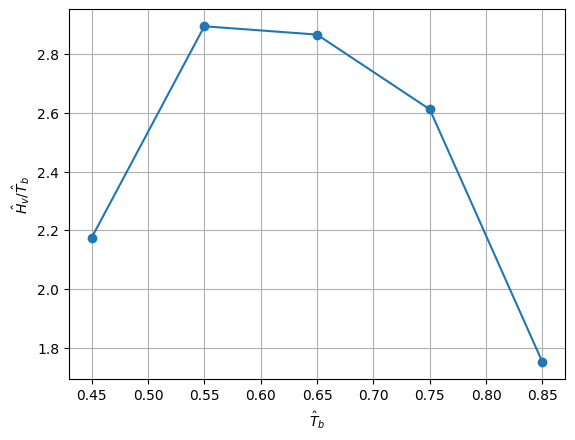

In [162]:
y = H_v * T2
plt.plot(T2, y, "o-")
plt.xlabel("$\hat{T}_b$")
plt.ylabel("$\hat{H}_v/\hat{T}_b$")
plt.grid(True)